# ПРАКТИЧЕСКАЯ РАБОТА 11. МЕТРИЧЕСКИЕ МЕТОДЫ КЛАССИФИКАЦИИ

Котляров Денис Владимирович
ПИН-б-о-22-1 09.03.03 Прикладная информатика

Цели и задачи
Цель лабораторной работы: изучение принципов построения
информационных систем с использованием метрических методов классификации.
Основные задачи:
– изучение инструментария Python для реализации алгоритмов метрической
классификации;
– изучение методов оптимизации параметров метрической классификации;
– освоение модификаций kNN-метода.


In [2]:
import pandas as pd
import numpy as np

Для выполнения лабораторной работы был использован датасет adult.data. 
"Извлечение данных из базы данных переписи 1994 года было выполнено Барри Беккером."

Описание переменных: >50К, <=50К. возраст: непрерывный. Рабочий класс: Частный, Самостоятельный, не включаемый, Самостоятельный, Федеральный, Местный, Государственный, Без оплаты, Никогда не работал. fnlwgt: непрерывный. образование: бакалавриат, колледж, 11-й, высшая школа, проф-школа, доцент, доцент, 9, 7-8, 12, магистр, 1-4, 10, докторская степень, 5-6, дошкольное. номер образования: непрерывное. Семейное положение: Женат-гражданский супруг, Разведен, Никогда не был женат, Раздельно живёт, Вдова, Женат-супруга-отсутствует, Женат-AF-супруга. Род занятий: Техподдержка, Ремесленно-ремонтный, Прочие услуги, Продажи, Руководитель-менеджер, Профессор-специальности, Обработчики-уборщики, Машино-осмотр, Администратор-Канцелярский, Сельскохозяйственно-рыболовный, Транспортно-переездной, Частный дом- служба, Защитная служба, Вооруженные Силы. Отношения: Жена, Собственный ребенок, Муж, Несемейный, Другой родственник, Незамужний. раса: Белый, Азиатско-Тихоокеанский островитянин, Американец-Индеец-Эскимос, Другой, Черный. пол: Женский, Мужской. прирост капитала: непрерывный. потери капитала: постоянные. часов в неделю: непрерывно. Родная страна: США, Камбоджа, Англия, Пуэрто-Рико, Канада, Германия, отдаленные США (Гуам-USVI-и т. д.), Индия, Япония, Греция, Юг, Китай, Куба, Иран, Гондурас, Филиппины, Италия. , Польша, Ямайка, Вьетнам, Мексика, Португалия, Ирландия, Франция, Доминиканская Республика, Лаос, Эквадор, Тайвань, Гаити, Колумбия, Венгрия, Гватемала, Никарагуа, Шотландия, Таиланд, Югославия, Сальвадор, Тринадад и Тобаго, Перу, Гонконг , Голландия-Нидерланды.

In [6]:
data_source = 'D:/ИИ_СКФУ_лабы/3_laba/adult.data'
d = pd.read_table(data_source, delimiter=',', names= ['age', 'workclass', 'fniwgt',
                                                       'education', 'education-num',
                                                    'marital-status', 'occupation',
                                                    'relationship', 'race',
                                                    'sex', 'capital-gain',
                                                    'capital-loss',
                                                    'hours-per-week',
                                                    'native-country',
                                                    'income' ])
d.head()


,age,workclass,fniwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
import seaborn as sb


Для понимания какие данные кареллируют между собой используем pairplot

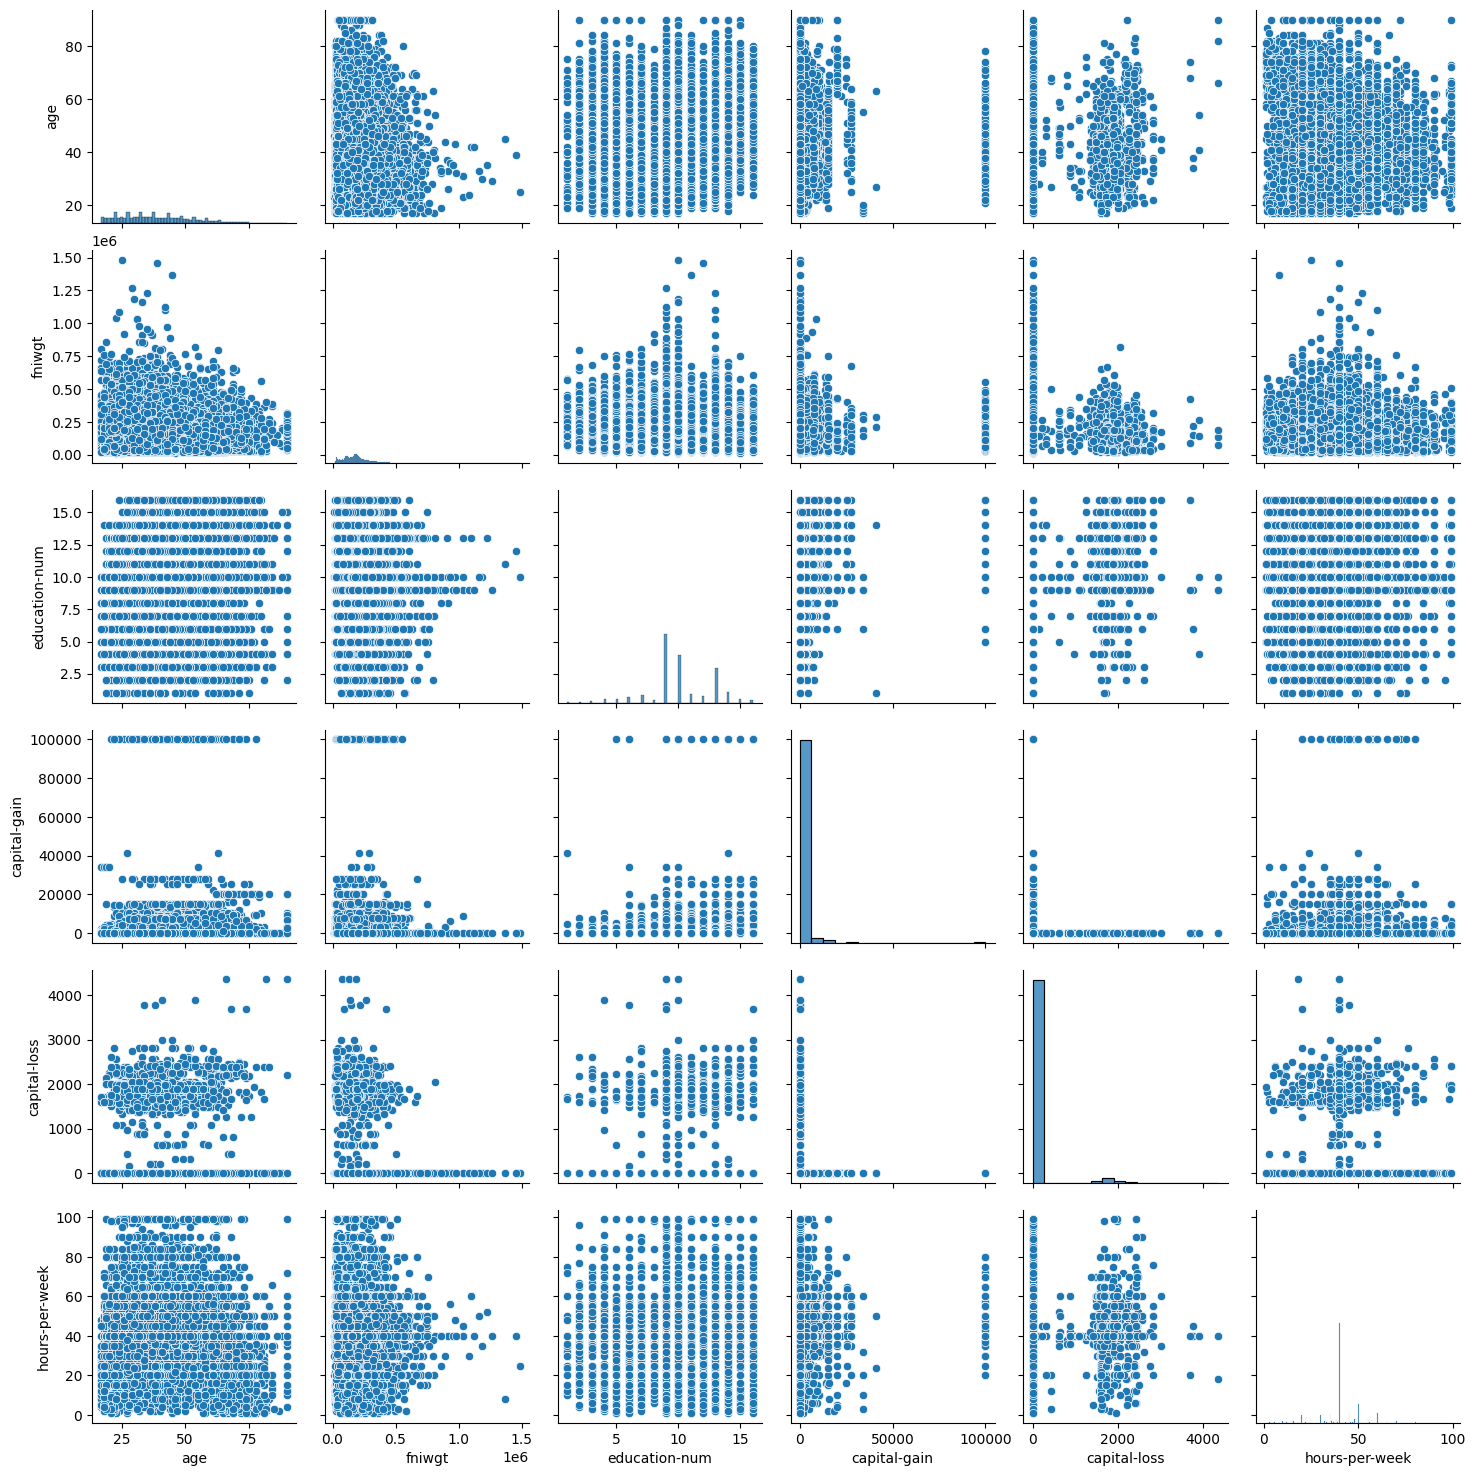

In [8]:
sb.pairplot(d)

Чтобы лучше визуализировать графики, надо добавить условие, по которому точки будут по разному раскрашены. Например как условие возьмем переменную "income", которая может иметь лишь 2 значения: доход меньше или равен 50К, или больше 50К

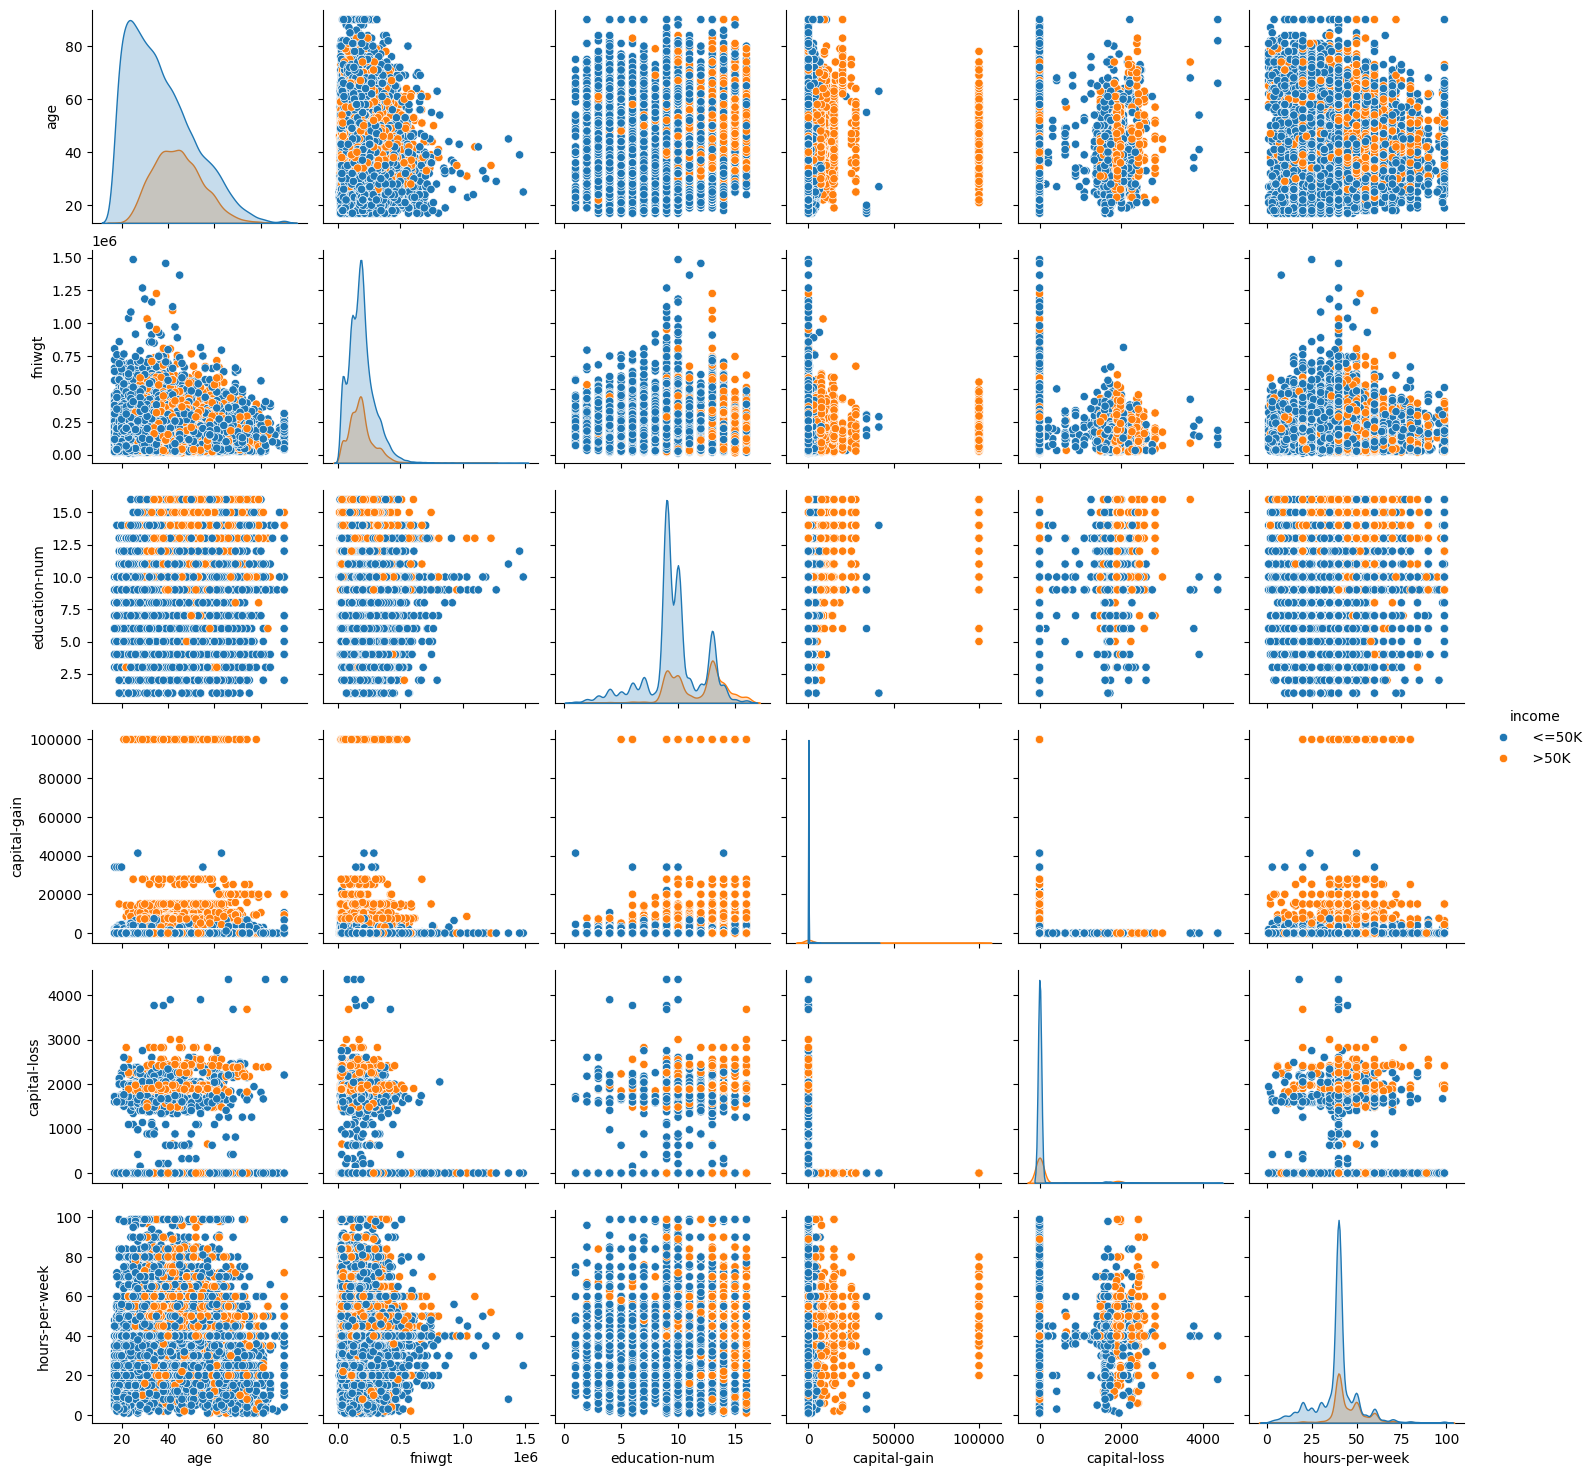

In [9]:
sb.pairplot(d, hue='income')

Теперь можно построить модель классификатора используя метод KNN и метрику точности

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Выбираем переменные, которые будут использоваться для классификации

In [11]:
X_train = d[['age', 'fniwgt', 'education-num',
              'capital-gain', 'capital-loss',
                'hours-per-week']]
Y_train = d['income']

Выставляем значение для количества "соседей". Инициализируем классификатор и обучаем его

In [12]:
K = 3
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

Создаем тестовый элемент, присваеваем ему рандомные значения и модель предсказывает для него значение "income" - дохода.

In [13]:
X_test = np.array([[20, 70000, 10, 40000, 10000, 40 ]])
target = knn.predict(X_test)
print(target)

[' >50K']


c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Чтобы узнать точность классификатора воспользуемся метрикой точности - accuracy


Разделим датасет на тренировочные данные и houldout для проверки с помощью train_test_split в пропорции 0.3

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, Y_train, Y_holdout = train_test_split(d[['age', 'fniwgt',
                                                              'education-num',
              'capital-gain', 'capital-loss',
                'hours-per-week']],
                d['income'],
                test_size=0.3,
                random_state=17)


In [15]:
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(Y_holdout, knn_pred)
print("acc = ", accur)

acc =  0.755758010031733


Получили значение точности 0.76. Чтобы оптимизировать алгоритм классификации нужно менять значение соседей K. Для нахождения оптимального значения K построимм график точности от K.


In [16]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Воспользуемся кросс-валидацией дял получения значения точности

In [17]:
k_list = list(range(1,50))
cv_scores = []
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, d[['age', 'fniwgt',
                                    'education-num',
                                    'capital-gain', 'capital-loss',
                                    'hours-per-week']],
                                    d['income'],
                                    cv=10,
                                    scoring='accuracy')
    cv_scores.append(scores.mean())

Посчитаем MSE ошибку для каждого значения K и построим график, на котором минимумы будут соответствовать оптимальным значениям K

In [18]:
MSE = [1-x for x in cv_scores]

Text(0, 0.5, 'Ошибка')

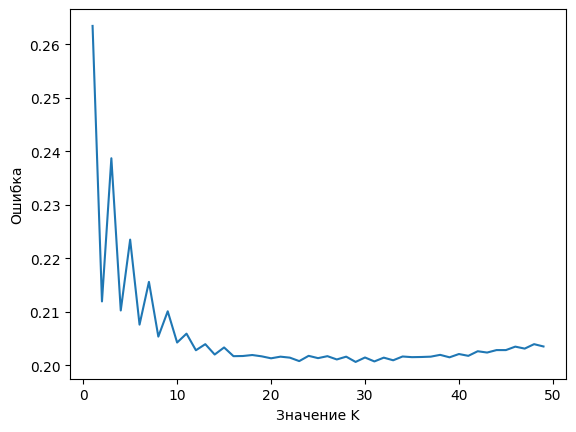

In [19]:
plt.plot(k_list, MSE)
plt.xlabel("Значение K")
plt.ylabel("Ошибка")

Минимальное значение ошибки может быть не одно, поэтому пройдемся циклом по списку значений MSE для выявления всех минимумов

In [20]:
k_min = min(MSE)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])
print("Все оптимальные значения K: ", all_k_min)

Все оптимальные значения K:  [29]


Получили значение для K равным 29, при котором классификатор наиболее точно выполняет свою работу

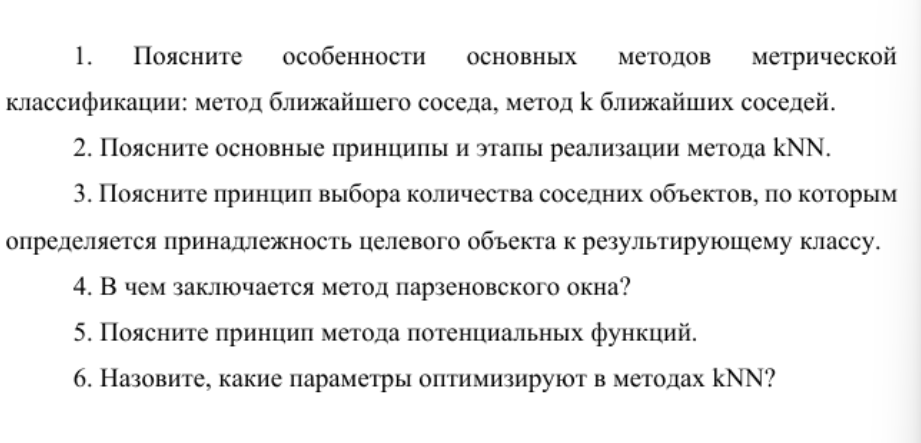

1. Методы ближайших соседей просты в реализации и являются одними из самых простых методов в машинном обучении. Метод не создает обобщенную модель, он просто запоминает тренировочные данные. Метод не имеет гиперпараметров, которые надо настраивать кроме значения K. Чувствителен к масштабу признаков. так как работает на высчитывании растояния между значениями. Вычислительнозатратен, так как для всех навых значений расчитывает разтояния между всеми остальными точками.
2. При реализации метода ближайших соседей происходит разбиение датасета на тренировочные и валидационные данные, создание классификатора, обучение классификатора, проверка на тестовых данных и получения метрик точности.
3. Принцип выборва колличества соседей заключается в нахождении минимума ошибки для определенного значения K
4. Основная идея метода заключается в том, чтобы рассматривать окно вокруг каждой точки данных и подсчитывать, сколько наблюдений находится в этом окне. Плотность в данной точке определяется как отношение числа наблюдений в окне к общему числу наблюдений, умноженное на обратную площадь окна.
5. Метод заключается в преобразовании пространства признаков, использую потенциальные функции, чтобы классы данных были линейно разделимы.
6. В методах knn оптимизируют значения количества соседей, которые учитываются алгоритмом.